In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

import cv2
from tqdm import tqdm
import h5py

['train', 'sampleSubmission.csv', 'test1']


In [34]:
path="../input/train/train"
new_path_train="../input/train/train_new_resized_96"
label=[]
data1=[]
counter=0

In [35]:
#labeling the data
for file in os.listdir(path):
    image_data=cv2.imread(os.path.join(path,file), cv2.IMREAD_GRAYSCALE)
    image_data=cv2.resize(image_data,(96,96))
    if file.startswith("cat"):
        label.append(0) #labeling cats pictures with 0
    elif file.startswith("dog"):
        label.append(1) #labeling dogs pictures with 1
    try:
        data1.append(image_data/255)
    except:
        label=label[:len(label)-1]
    counter+=1
    if counter%1000==0:
        print (counter," image data labelled")

1000  image data labelled
2000  image data labelled
3000  image data labelled
4000  image data labelled
5000  image data labelled
6000  image data labelled
7000  image data labelled
8000  image data labelled
9000  image data labelled
10000  image data labelled
11000  image data labelled
12000  image data labelled
13000  image data labelled
14000  image data labelled
15000  image data labelled
16000  image data labelled
17000  image data labelled
18000  image data labelled
19000  image data labelled
20000  image data labelled
21000  image data labelled
22000  image data labelled
23000  image data labelled
24000  image data labelled
25000  image data labelled


In [36]:
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout

There are no silver bullets in terms of the CNN architecture design. The best way to find a model that’s appropriate for a specific case is to start with some basic design and iteratively improve it.

In [37]:
model=Sequential()

model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,1),activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 94, 94, 3)         30        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 10)        210       
__________

In [38]:
import numpy as np

data1=np.array(data1)
print (data1.shape)
data1=data1.reshape((data1.shape)[0],(data1.shape)[1],(data1.shape)[2],1)
#data1=data1/255
labels=np.array(label)

(25000, 96, 96)


In [39]:
print (data1.shape)
print (labels.shape)

(25000, 96, 96, 1)
(25000,)


Train on 18750 samples, validate on 6250 samples
Epoch 1/3
18750/18750 [==============================] - 24s 1ms/step - loss: 0.4556 - acc: 0.7878 - val_loss: 0.4733 - val_acc: 0.7819
Epoch 2/3
18750/18750 [==============================] - 24s 1ms/step - loss: 0.4477 - acc: 0.7909 - val_loss: 0.4770 - val_acc: 0.7781
Epoch 3/3
18750/18750 [==============================] - 24s 1ms/step - loss: 0.4411 - acc: 0.7937 - val_loss: 0.4679 - val_acc: 0.7810
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


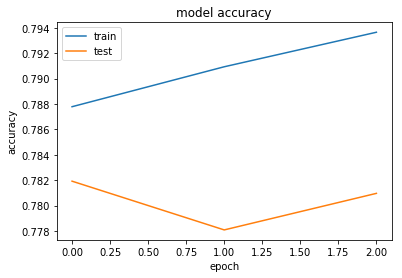

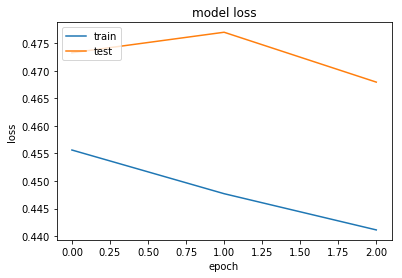

In [43]:
history = model.fit(data1,labels,validation_split=0.25,epochs=3,batch_size=10)
model.save_weights("model.h5")

# Fit the model
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_data=[]
id=[]
counter=0
for file in os.listdir("../input/test1/test1"):
    image_data=cv2.imread(os.path.join("../input/test1/test1",file), cv2.IMREAD_GRAYSCALE)
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("______")
    counter+=1
    if counter%1000==0:
        print (counter," image data retreived")

In [ ]:
test_data1=np.array(test_data)
print (test_data1.shape)
test_data1=test_data1.reshape((test_data1.shape)[0],(test_data1.shape)[1],(test_data1.shape)[2],1)

In [ ]:
dataframe_output=pd.DataFrame({"id":id})

In [ ]:
predicted_labels=model.predict(test_data1)

In [ ]:
predicted_labels=np.round(predicted_labels,decimals=2)

In [ ]:
labels=[1 if value>0.5 else 0 for value in predicted_labels]

In [ ]:
dataframe_output["label"]=labels

In [ ]:
dataframe_output.to_csv("submission.csv",index=False)